# Groupwork Assignment Submission 3 M6

# 1. Data Importing and Selection

In [114]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import multivariate_normal

from mpl_toolkits import mplot3d
import seaborn as sns
import pylab as py

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split


from statsmodels.tsa.statespace.varmax import VARMAX
import random

#import tensorflow.compat.v1 as tf
import numpy as np
import IPython.display
from sklearn.metrics import confusion_matrix

## 1.1 From the previous assignment, re-import the data from the csv file

In [115]:
df = pd.read_csv('MScFE 650 MLF GWP Data.csv')
df.head(2)

Date     LUXXX  MSCI ARGENTINA  ...  MSCI SWITZERLAND  MSCI UK  MSCI USA
0  1-Jan-16  1390.716         2376.29  ...           1148.37   1818.4   1949.70
1  8-Jan-16  1291.267         2260.85  ...           1075.30   1722.0   1831.88

[2 rows x 36 columns]

## 1.2 Choose one of the 35 variables to serve as your response variable (e.g. LUXXX).  Choose the same one that your group used in the previous assignment.

In [116]:
y = df['LUXXX']

# 2. Measuring Skewness

## Summarize the following metrics for each series

## 2.1 Calculate the skewness of each return series

In [117]:
df.skew()

LUXXX                    -0.748022
MSCI ARGENTINA            0.276295
BLP ORIENTE MEDIO        -0.600944
MSCI AUSTRALIA            0.172421
MSCI AUSTRIA             -0.157180
MSCI BELGIUM             -1.096933
MSCI BRAZIL              -0.552434
MSCI CANADA              -0.840165
MSCI CHINA               -0.211234
MSCI DENMARK              1.377058
MSCI EM ASIA             -0.321214
MSCI EM EU-MIDE-AFRICA   -0.273787
MSCI EM EUROPE           -0.104967
MSCI EM LATIN AMERICA    -0.754882
MSCI FINLAND             -0.652834
MSCI FRANCE              -0.228204
MSCI GERMANY             -0.512120
MSCI HONG KONG           -0.335210
MSCI INDIA               -0.425588
MSCI ITALY               -0.193540
MSCI JAPAN               -0.440382
MSCI KOREA               -0.196455
MSCI MEXICO              -0.870290
MSCI NETHERLANDS         -0.059940
MSCI NEW ZEALAND          0.969189
MSCI NORWAY              -0.382707
MSCI PERU                -0.407554
MSCI RUSSIA               0.161888
MSCI SINGAPORE      

## 2.2 Calculate the difference between the mean and the median for each series

In [118]:
df.mean() - df.median()

LUXXX                     -33.849095
MSCI ARGENTINA            -15.322738
BLP ORIENTE MEDIO         -83.931072
MSCI AUSTRALIA              6.565159
MSCI AUSTRIA               -3.216111
MSCI BELGIUM               -3.724762
MSCI BRAZIL               -46.970833
MSCI CANADA               -19.808373
MSCI CHINA                 -1.921786
MSCI DENMARK              219.852738
MSCI EM ASIA               -7.896944
MSCI EM EU-MIDE-AFRICA     -4.086091
MSCI EM EUROPE             -2.345357
MSCI EM LATIN AMERICA     -96.492262
MSCI FINLAND               -2.194722
MSCI FRANCE                -2.164524
MSCI GERMANY               -1.122103
MSCI HONG KONG           -125.678849
MSCI INDIA                -43.322024
MSCI ITALY                 -0.160873
MSCI JAPAN                 -9.907857
MSCI KOREA                 -2.258095
MSCI MEXICO               -73.685000
MSCI NETHERLANDS           -1.686825
MSCI NEW ZEALAND           10.054444
MSCI NORWAY               -74.667817
MSCI PERU                 -94.627183
M

## 2.3 How do the skewness and the (mean-median) difference compare?

In [119]:
pd.concat([(df.mean() - df.median()), df.skew()], axis=1)

0         1
LUXXX                   -33.849095 -0.748022
MSCI ARGENTINA          -15.322738  0.276295
BLP ORIENTE MEDIO       -83.931072 -0.600944
MSCI AUSTRALIA            6.565159  0.172421
MSCI AUSTRIA             -3.216111 -0.157180
MSCI BELGIUM             -3.724762 -1.096933
MSCI BRAZIL             -46.970833 -0.552434
MSCI CANADA             -19.808373 -0.840165
MSCI CHINA               -1.921786 -0.211234
MSCI DENMARK            219.852738  1.377058
MSCI EM ASIA             -7.896944 -0.321214
MSCI EM EU-MIDE-AFRICA   -4.086091 -0.273787
MSCI EM EUROPE           -2.345357 -0.104967
MSCI EM LATIN AMERICA   -96.492262 -0.754882
MSCI FINLAND             -2.194722 -0.652834
MSCI FRANCE              -2.164524 -0.228204
MSCI GERMANY             -1.122103 -0.512120
MSCI HONG KONG         -125.678849 -0.335210
MSCI INDIA              -43.322024 -0.425588
MSCI ITALY               -0.160873 -0.193540
MSCI JAPAN               -9.907857 -0.440382
MSCI KOREA               -2.258095 -0.196455
MSCI MEXICO             -73.685000 -0.870290
MSCI NETHERLANDS         -1.686825 -0.059940
MSCI NEW ZEALAND         10.054444  0.969189
MSCI NORWAY             -74.667817 -0.382707
MSCI PERU               -94.627183 -0.407554
MSCI RUSSIA               1.082738  0.161888
MSCI SINGAPORE          -48.059245 -0.256414
MSCI SOUTH AFRICA        -2.966865 -0.564107
MSCI SPAIN               -2.606587 -0.655240
MSCI SWEDEN            -141.255952 -0.176503
MSCI SWITZERLAND         13.266468  0.252066
MSCI UK                 -68.507421 -0.956429
MSCI USA                -32.631468  0.068945

We observe that the sign is the same for skewness and (mean-median) difference.

# 3. Structural Breaks and Kurtosis

## 3.1 Calculate the kurtosis for your response return series

In [120]:
df.kurt()

LUXXX                    -0.346826
MSCI ARGENTINA           -0.749353
BLP ORIENTE MEDIO        -0.552195
MSCI AUSTRALIA           -0.213729
MSCI AUSTRIA             -1.079038
MSCI BELGIUM              0.281762
MSCI BRAZIL              -0.389455
MSCI CANADA               0.549749
MSCI CHINA               -0.796897
MSCI DENMARK              1.784841
MSCI EM ASIA             -0.701812
MSCI EM EU-MIDE-AFRICA    0.433917
MSCI EM EUROPE           -0.411061
MSCI EM LATIN AMERICA    -0.172098
MSCI FINLAND             -0.347102
MSCI FRANCE              -0.714189
MSCI GERMANY             -0.021322
MSCI HONG KONG           -0.730340
MSCI INDIA               -0.980302
MSCI ITALY               -0.898782
MSCI JAPAN               -0.440768
MSCI KOREA               -0.965059
MSCI MEXICO               0.331357
MSCI NETHERLANDS         -0.669791
MSCI NEW ZEALAND         -0.203214
MSCI NORWAY              -1.210283
MSCI PERU                -0.902463
MSCI RUSSIA               0.345371
MSCI SINGAPORE      

## 3.2 Run a threshold regression model to identify at least 1 regime shift.

In [146]:
markov_auto_regression = sm.tsa.MarkovRegression(
    df["LUXXX"], k_regimes=2
)
res = markov_auto_regression.fit()
print(res.summary())

                        Markov Switching Model Results                        
Dep. Variable:                  LUXXX   No. Observations:                  252
Model:               MarkovRegression   Log Likelihood               -1629.403
Date:                Mon, 17 Jan 2022   AIC                           3268.806
Time:                        09:20:06   BIC                           3286.454
Sample:                             0   HQIC                          3275.907
                                - 252                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        998.6616     27.422     36.418      0.000     944.916    1052.408
                             Regime 1 parameters    

In [122]:
res.expected_durations

array([112.0014886, 290.0110601])

In [123]:
res.regime_transition

array([[[0.99107155],
        [0.00344814]],

       [[0.00892845],
        [0.99655186]]])

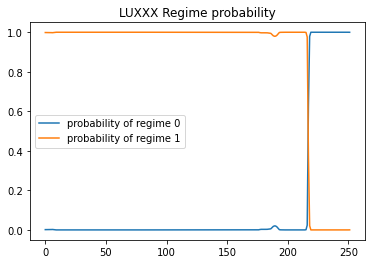

In [124]:
plt.plot(res.smoothed_marginal_probabilities[0], label="probability of regime 0")
plt.plot(res.smoothed_marginal_probabilities[1], label="probability of regime 1")
plt.title("LUXXX Regime probability")
plt.legend()
plt.show()

## 3.3 Calculate the standard deviation of the return series for each regime.

In [125]:
expected_regime =  (res.smoothed_marginal_probabilities[1] > res.smoothed_marginal_probabilities[0]).astype(int)
expected_regime = expected_regime[1:]
expected_regime.name = "regime"
ret = df["LUXXX"].pct_change()[1:]
ret.name = "ret"
ret_data = pd.DataFrame([expected_regime, ret]).T

print("regime std")
print(ret_data.groupby(['regime'])['ret'].std())

regime std
regime
0.0    0.055273
1.0    0.028661
Name: ret, dtype: float64


## 3.4 Fit a Bivariate Normal Distribution BN(mean1, standard deviation1, mean2, standard deviation2, mixing parameter).  For simplicity, you can assume the means are the same.

In [126]:
# means = [df["LUXXX"].mean(), df["MSCI BRAZIL"].mean()]

joined_data = pd.DataFrame([df["LUXXX"], df["MSCI BRAZIL"]]).T

joined_data.cov()
joined_data.mean()
var = multivariate_normal(mean=joined_data.mean(), cov=joined_data.cov())

Text(0.5, 0, 'pdf')

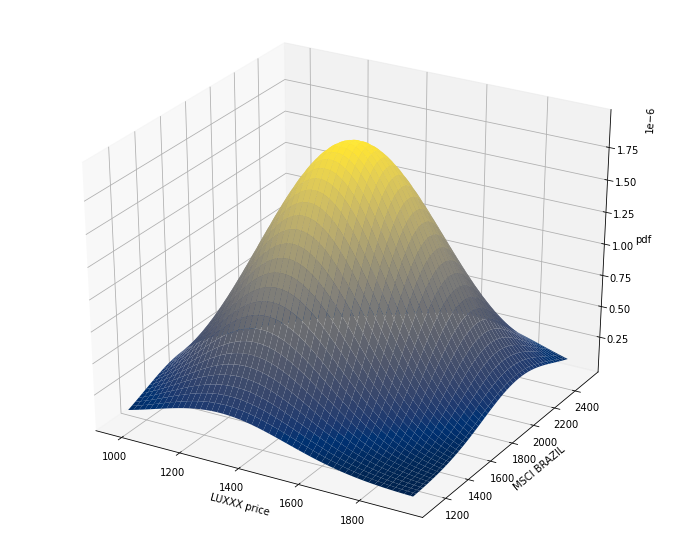

In [127]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

mean_0 = joined_data.mean()["LUXXX"]
std_0 = np.sqrt(joined_data.cov()["LUXXX"]["LUXXX"])
mean_1 = joined_data.mean()["MSCI BRAZIL"]
std_1 = np.sqrt(joined_data.cov()["MSCI BRAZIL"]["MSCI BRAZIL"])


x = np.linspace(mean_0-2*std_0, mean_0+2*std_0, 100)
y = np.linspace(mean_1-2*std_1, mean_1+2*std_1, 100)

X, Y = np.meshgrid(x, y)
Z = []
for x_cur in x:
  for y_cur in y:
    cur_var = var.pdf([x_cur, y_cur])
    Z.append(cur_var)

Z = np.array(Z)
Z.resize(len(x), len(y))
Z
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
ax.set_xlabel('LUXXX price')
ax.set_ylabel('MSCI BRAZIL')
ax.set_zlabel('pdf')

# 4 Visualizing Distributions

## 4.1 Use your response variable that you ran a regime shift model.  Show the following graphs in side-by-side panels.  Keep the scales of the 2 graphs the same!

## 4.2 Plot histograms for each return series.  Superimpose a density plot on top.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


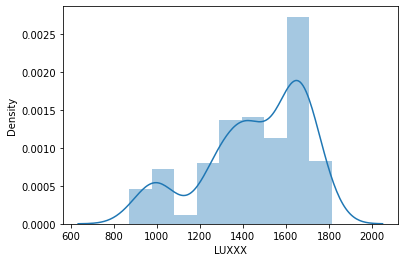

In [128]:
sns.distplot(a=df["LUXXX"])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


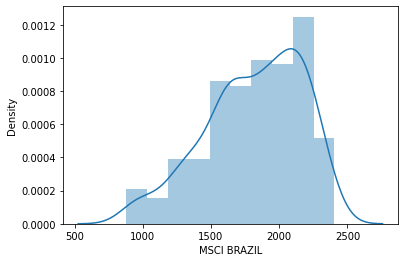

In [129]:
sns.distplot(a=df['MSCI BRAZIL'])

plt.show()

## 4.3 Plot a qqplot for each return series.  Superimpose the points on the plot

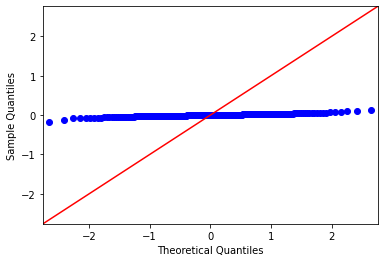

In [130]:
sm.qqplot(df["LUXXX"].pct_change()[1:], line ='45')
py.show()

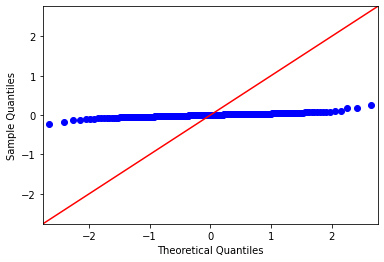

In [131]:
sm.qqplot(df['MSCI BRAZIL'].pct_change()[1:], line ='45')
py.show()

# 5 Outliers

## 5.1 Using a combination of calculated stats and visuals, identify the outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


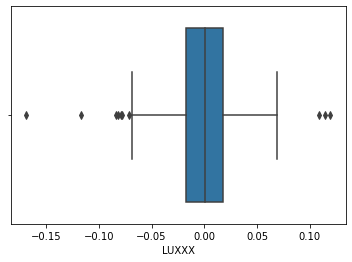

In [132]:
data_pct_change = df["LUXXX"].pct_change()[1:]
sns.boxplot(data_pct_change)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


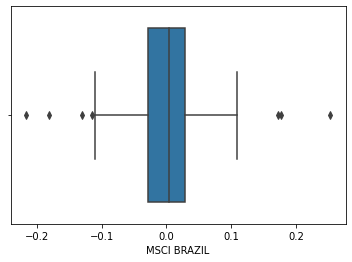

In [133]:
data_pct_change = df["MSCI BRAZIL"].pct_change()[1:]
sns.boxplot(data_pct_change)

plt.show()

In [134]:
data_std = data_pct_change.std()
data_mean = data_pct_change.mean()
outliers = data_pct_change[data_pct_change > data_mean + 2*data_std].append(data_pct_change[data_pct_change < data_mean - 2*data_std])
outliers

9      0.253207
223    0.171796
226    0.103185
229    0.109020
231    0.177659
45    -0.110523
72    -0.130855
217   -0.107914
219   -0.181571
220   -0.217336
225   -0.115280
Name: MSCI BRAZIL, dtype: float64

## 5.2 What is a monotone transformation?

A monotonic transformation is a method of changing one set of numbers into another while maintaining the order of the numbers.

## 5.3 Is there a monotone transformation of the data that can help handle the outliers better?  If so, perform it.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


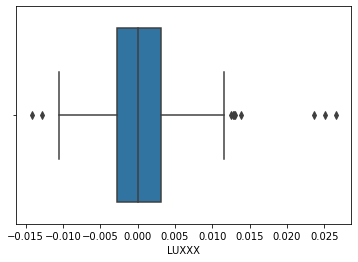

In [135]:
min_ret = -min(df["LUXXX"].pct_change()[1:])

transformed_data = np.square((df["LUXXX"].pct_change()[1:] + min_ret)) - np.square(min_ret)

min_ret = -min(transformed_data)
transformed_data = np.sqrt(transformed_data +min_ret + 1) - np.sqrt(min_ret + 1)
sns.boxplot(transformed_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


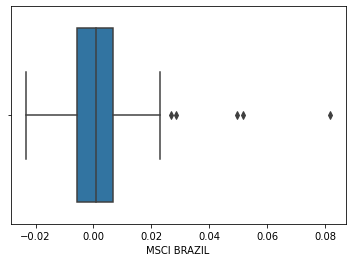

In [136]:
min_ret = -min(df["MSCI BRAZIL"].pct_change()[1:])

transformed_data = np.square((df["MSCI BRAZIL"].pct_change()[1:] + min_ret)) - np.square(min_ret)

min_ret = -min(transformed_data)
transformed_data = np.sqrt(transformed_data +min_ret + 1) - np.sqrt(min_ret + 1)
sns.boxplot(transformed_data)
plt.show()

# 6 Compare unsupervised and supervised methods of learning

## 6.1 Is the neural network methodology supervised or unsupervised?  Explain.

The neural network methodology is supervised. In order to run backpropigation to train the neural net, the network needs inputs and the associated expected output to have a cost function to train the neural net to minimize the cost function.

# 7 Vector Auto-Regressive Moving Average (VARMA)

## 7.1 Run an VARMA model, which models your response (e.g. LUXXX) versus lagged versions of itself AND with some number of exogeneous variables (e.g. the other ETFs). Use the variables you chose from your LASSO regression (see GWP#1).  

In [137]:
y = pd.DataFrame(df.iloc[:, 1])
x = pd.concat([pd.DataFrame(df.iloc[:, 2]), df.iloc[:, 3:]], axis=1)

In [138]:
model = Lasso(alpha=0.1)
model.fit(x, y)

tuples = []
for i,v in enumerate(model.coef_):
    tuples.append((i, v))
# 	print('Feature: %0d, Score: %.5f' % (i,v))

# choose the 7 most important predictiors by the coefficient
tuples.sort(key = lambda x: abs(x[1]), reverse=True)

topPredictors = pd.DataFrame()
for i in range(0,7):
    curSer = x.iloc[:, tuples[i][0]]
    topPredictors[curSer.name] = curSer
    
topPredictors

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+05, tolerance: 1.429e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


MSCI ITALY  MSCI SPAIN  ...  MSCI FRANCE  MSCI AUSTRIA
0         61.26      108.40  ...       131.10        106.70
1         56.94      101.00  ...       122.85         97.66
2         54.86       97.34  ...       119.45         93.54
3         54.36       99.21  ...       123.00         95.79
4         53.16      100.06  ...       125.61         96.93
..          ...         ...  ...          ...           ...
247       48.90       78.45  ...       137.63         84.95
248       49.52       79.97  ...       140.51         84.89
249       50.76       82.44  ...       144.34         90.01
250       50.23       81.31  ...       143.76         88.66
251       50.06       81.81  ...       143.20         89.74

[252 rows x 7 columns]

In [139]:
# concat the x and y
def get_data(topPredictors, y):
  x_varma = pd.concat([topPredictors, y], axis=1)
  #get rid of last element
  x_varma = x_varma.iloc[:-1, :]
  # get rid of first element so we preict the future results
  y_varma = pd.concat([y.iloc[1:, :], topPredictors.iloc[1:, 0]], axis=1)
  y_varma.index = range(0,len(y_varma))

  # compute pct change for stationarity
  x_varma_pct = x_varma.pct_change()[1:]
  y_varma_pct = y_varma.pct_change()[1:]
  return x_varma_pct, y_varma_pct

x_varma_pct, y_varma_pct = get_data(topPredictors, y)

In [140]:
y_varma_pct


LUXXX  MSCI ITALY
1   -0.026471   -0.036530
2   -0.002322   -0.009114
3    0.035141   -0.022075
4   -0.018185   -0.076561
5   -0.068617   -0.038093
..        ...         ...
246 -0.060663   -0.040236
247  0.049442    0.012679
248  0.037079    0.025040
249 -0.007048   -0.010441
250  0.021051   -0.003384

[250 rows x 2 columns]

In [141]:
varmax_model = sm.tsa.VARMAX(endog=y_varma_pct, exog=x_varma_pct, order=(2, 0, 2))
res = varmax_model.fit(maxiter=1000, disp=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [142]:

model_log_likelihood = res.llf
model_log_likelihood

1085.4735127303707

In [143]:
print (res.summary())

                              Statespace Model Results                             
Dep. Variable:     ['LUXXX', 'MSCI ITALY']   No. Observations:                  250
Model:                             VARX(2)   Log Likelihood                1085.474
                               + intercept   AIC                          -2112.947
Date:                     Mon, 17 Jan 2022   BIC                          -2010.825
Time:                             09:12:34   HQIC                         -2071.846
Sample:                                  0                                         
                                     - 250                                         
Covariance Type:                       opg                                         
Ljung-Box (Q):                51.49, 44.91   Jarque-Bera (JB):       125.42, 101.23
Prob(Q):                        0.11, 0.27   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.04, 1.02   Skew:                     -0.27

## 7.2 What is the difference between how we ran LASSO (GWP #1) and the VARMA?  (Hint: think about time subscripts)

The lasso regression only takes into account the current exogenous variables to predict the current endogenous variable where as the VARMA has memory and takes into account the previous exogenous values.

## 7.3 Find a different set of variables that works BETTER than the original LASSO regression.  Show a statistical measure to justify its improved performance.

In [147]:
iteration = 0
while True:
  tuples = []
  for i,v in enumerate(model.coef_):
      tuples.append((i, v))
  # 	print('Feature: %0d, Score: %.5f' % (i,v))

  # choose 7 features by random
  tuples.sort(key = lambda x: random.random(), reverse=True)

  topPredictors = pd.DataFrame()
  for i in range(0,7):
      curSer = x.iloc[:, tuples[i][0]]
      topPredictors[curSer.name] = curSer
      
  x_varma_pct, y_varma_pct = get_data(topPredictors, y)
  varmax_model = sm.tsa.VARMAX(endog=y_varma_pct, exog=x_varma_pct, order=(2, 0, 2))
  res = varmax_model.fit(maxiter=1000, disp=False)

  print("iteration %d" % iteration)

  if res.llf < model_log_likelihood:
    break
  iteration = iteration +1

iteration 0
iteration 1
iteration 2


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [148]:
print(res.summary())

                              Statespace Model Results                              
Dep. Variable:     ['LUXXX', 'MSCI BRAZIL']   No. Observations:                  250
Model:                              VARX(2)   Log Likelihood                 956.319
                                + intercept   AIC                          -1854.638
Date:                      Mon, 17 Jan 2022   BIC                          -1752.516
Time:                              09:23:03   HQIC                         -1813.537
Sample:                                   0                                         
                                      - 250                                         
Covariance Type:                        opg                                         
Ljung-Box (Q):                54.81, 24.82   Jarque-Bera (JB):        111.10, 15.59
Prob(Q):                        0.06, 0.97   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         2.96, 1.22   Skew:                 

# 8 Neural Networks

## 8.1 Perform a Neural Network, where the response is categorical: whether your return was higher or lower than the previous week.  (Ties can be ignored).  Choose a suitable number of layers, basing your result on cross-validation

### Step-1: Importing and Processing the Dataset

In [ ]:
# Creating the dataset and normalising the features
X=df.copy()
X.drop(columns=['Date', 'LUXXX'], inplace=True)
X_return=np.log(X).diff().dropna()

y=df.LUXXX
y_return = np.log(y).diff().dropna()
#print(X.shape)
#print(X_return)

data_clsnn = X_return.copy()
data_clsnn.insert(0, 'LUXXX', y_return)
data_clsnn.insert(0, 'LUXXX Ret Dir', (data_clsnn['LUXXX'] > data_clsnn['LUXXX'].shift()) * 1) # Response variable returning 1 if LUXXX return in a given week exceeds that of prev week and 0 otherwise
del data_clsnn['LUXXX']

data_clsnn

LUXXX Ret Dir  MSCI ARGENTINA  ...   MSCI UK  MSCI USA
1                0       -0.049800  ... -0.054471 -0.062333
2                1       -0.019360  ... -0.017321 -0.023373
3                1        0.028663  ...  0.015932  0.013631
4                1        0.076008  ...  0.031365  0.016272
5                0        0.006768  ... -0.038795 -0.032605
..             ...             ...  ...       ...       ...
247              0       -0.039489  ... -0.028733 -0.005265
248              1        0.037665  ...  0.010080  0.016219
249              0        0.071181  ...  0.017587  0.038317
250              0        0.006575  ... -0.018909  0.002575
251              1       -0.005722  ... -0.008350 -0.006049

[251 rows x 35 columns]

### Step-2: Neural Network Helper Functions For Classification and Regression

In [ ]:
# NN Helper Functions - Split Data into Train, Cross-validation and Test Sets
def data_split(dataset, response_var):

    from sklearn.model_selection import train_test_split    
    data_train_cv, data_test = train_test_split(dataset, test_size = 1/10, shuffle = True, random_state = 1) #10% goes into training

    y_test = data_test[response_var]
    X_test = data_test.loc[:, dataset.columns != response_var]
    
    data_train, data_cv = train_test_split(data_train_cv, test_size = 25/226, shuffle = True, random_state = 1) # 10% of 251 or 11% of (251-25) goes into CV
    
    y_train = data_train[response_var]
    X_train = data_train.loc[:, dataset.columns != response_var]
    
    y_cv = data_cv[response_var]
    X_cv = data_cv.loc[:, dataset.columns != response_var]

    return y_test, X_test, y_train, X_train, y_cv, X_cv

In [ ]:
# NN Helper Functions - Initialisation
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network
    

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1]) #He initialisation
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
    assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

In [ ]:
# NN Helper Functions - Forward Propagation
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W, A) + b #no. of units in layer l x no. of training egs
    cache = (A, W, b)
    
    return Z, cache

def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

def linear(Z):
    """
    Implements the linear activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = Z
    cache = Z
    
    return A, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    elif activation == "linear":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = linear(Z)
        
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward(X, parameters, final_activation):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID/LINEAR computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    final_activation -- choice of final activation ('sigmoid', 'linear')
    
    Returns:
    AL -- activation value from the output (last) layer
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    # The for loop starts at 1 because layer 0 is the input
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = 'relu')
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = final_activation)
    caches.append(cache)
          
    return AL, caches

In [ ]:
# NN Helper Functions - Cost Function
def compute_cost(AL, Y, typ):
    """
    Implement the cross-entropy cost for classification and MSE cost for regression.

    Arguments:
    AL -- final layer output (probability for classification and continuous value for regression), shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)
    typ -- type of cost function ('cross-entropy' or 'MSE')

    Returns:
    cost -- cross-entropy cost for classification and MSE cost for regression
    """
    
    m = Y.shape[0]

    # Compute loss from aL and y.
    
    if typ == 'cross-entropy':
        cost = -np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL))/m    
        cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    
    elif typ == 'MSE':
        cost = np.sum(np.square(AL - Y))/(2*m)
        cost = np.squeeze(cost)
    
    return cost

def compute_cost_with_regularization(AL, Y, parameters, lambd, layer_dims, typ):
    m = Y.shape[0]
    L = len(layer_dims) # number of layers in the network
    
    L2_regularization_cost = 0
    for l in range(1, L):
        L2_regularization_cost += np.sum(np.square(parameters['W'+ str(l)]))
    
    L2_regularization_cost *= (lambd/(2*m))
    
    if typ == 'cross-entropy':
        cost = compute_cost(AL, Y, typ = 'cross-entropy') + L2_regularization_cost
    
    elif typ == 'MSE':
        cost = compute_cost(AL, Y, typ = 'MSE') + L2_regularization_cost
    
    return cost

In [ ]:
# NN Helper Functions - Backward Propagation
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T)/m # units in layer l x units in layer (l-1)
    db = np.sum(dZ, axis = 1, keepdims = True)/m # units in layer l x no. of training egs.
    dA_prev = np.dot(W.T, dZ) # units in layer (l-1) x no. of training egs.
    
    return dA_prev, dW, db

def linear_backward_with_regularization(dZ, cache, lambd):
    """
    Implement the linear portion of backward propagation for a single layer (layer l) with L2 regularization

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
    lamdb -- L2 regularization parameter

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T)/m + (lambd/m) * W # units in layer l x units in layer (l-1)
    db = np.sum(dZ, axis = 1, keepdims = True)/m # units in layer l x no. of training egs.
    dA_prev = np.dot(W.T, dZ) # units in layer (l-1) x no. of training egs.
    
    return dA_prev, dW, db

def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def linear_activ_backward(dA, cache):
    """
    Implement the backward propagation for a single LINEAR unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = dA
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu" or "linear"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == 'linear':
        dZ = linear_activ_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

def linear_activation_backward_with_regularization(dA, cache, activation, lambd):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer with L2 regularization.

    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_with_regularization(dZ, linear_cache, lambd)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_with_regularization(dZ, linear_cache, lambd)

    elif activation == "linear":
        dZ = linear_activ_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_with_regularization(dZ, linear_cache, lambd)
        
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches, final_activation):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    final_activation -- choice of final activation (sigmoid or linear)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    if final_activation == 'sigmoid':
        dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    elif final_activation == 'linear':
        dAL = AL - Y
    
    # Lth layer (SIGMOID/LINEAR -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    
    if final_activation == 'sigmoid':
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, cache = current_cache, activation = 'sigmoid')
    
    elif final_activation == 'linear':
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, cache = current_cache, activation = 'linear')    
    
    grads['dA' + str(L-1)] = dA_prev_temp
    grads['dW' + str(L)] = dW_temp
    grads['db' + str(L)] = db_temp
    #print(grads)
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads['dA' + str(l+1)], cache = current_cache, activation = 'relu')
        grads['dA' + str(l)] = dA_prev_temp
        grads['dW' + str(l+1)] = dW_temp
        grads['db' + str(l+1)] = db_temp
        #print(grads)

    return grads

def L_model_backward_with_regularization(AL, Y, caches, lambd, final_activation):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group with L2 regularization
    
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    if final_activation == 'sigmoid':
        dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    elif final_activation == 'linear':
        dAL = AL - Y
    
    # Lth layer (SIGMOID/LINEAR -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    
    if final_activation == 'sigmoid':
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward_with_regularization(dAL, cache = current_cache, activation = 'sigmoid', lambd = lambd)
    
    elif final_activation == 'linear':
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward_with_regularization(dAL, cache = current_cache, activation = 'linear', lambd = lambd)
    
    grads['dA' + str(L-1)] = dA_prev_temp
    grads['dW' + str(L)] = dW_temp
    grads['db' + str(L)] = db_temp
    #print(grads)
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward_with_regularization(grads['dA' + str(l+1)], cache = current_cache, activation = 'relu', lambd = lambd)
        grads['dA' + str(l)] = dA_prev_temp
        grads['dW' + str(l+1)] = dW_temp
        grads['db' + str(l+1)] = db_temp
        #print(grads)

    return grads

In [ ]:
# NN Helper Functions - Gradient Descent Update
def update_parameters(params, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    params -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    parameters = params.copy()
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter
    for l in range(L):
        parameters['W' + str(l+1)] = parameters['W' + str(l+1)] - learning_rate * grads['dW' + str(l+1)]
        parameters['b' + str(l+1)] = parameters['b' + str(l+1)] - learning_rate * grads['db' + str(l+1)]
        #print(parameters)
        
    return parameters

In [ ]:
## L Layer Model
def L_layer_model(X, Y, layer_dims, learning_rate, num_iterations, final_activation, print_cost=False, lambd = 0):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_features, number of examples)
    Y -- true "label" vector of shape (1, number of examples)
    layer_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    final_activation -- choice of final activation ('linear' for continuous output and 'sigmoid' for classification)
    print_cost -- if True, it prints the cost every 100 steps
    lambd -- regularization parameter
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layer_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID/ LINEAR.
        if final_activation == 'sigmoid':
            AL, caches = L_model_forward(X, parameters, final_activation)
        
        elif final_activation == 'linear':
            AL, caches = L_model_forward(X, parameters, final_activation)
        
        # Compute cost.
        if lambd == 0:
            if final_activation == 'sigmoid':
                cost = compute_cost(AL, Y, typ = 'cross-entropy')
            
            elif final_activation == 'linear':
                cost = compute_cost(AL, Y, typ = 'MSE')
        
        else:
            if final_activation == 'sigmoid':
                cost = compute_cost_with_regularization(AL, Y, parameters, lambd, layer_dims, typ = 'cross-entropy')

            elif final_activation == 'linear':
                cost = compute_cost_with_regularization(AL, Y, parameters, lambd, layer_dims, typ = 'MSE')
            
        # Backward propagation.
        if lambd == 0:
            if final_activation == 'sigmoid':
                grads = L_model_backward(AL, Y, caches, final_activation)

            elif final_activation == 'linear':
                grads = L_model_backward(AL, Y, caches, final_activation)
             
        else:
            if final_activation == 'sigmoid':
                grads = L_model_backward_with_regularization(AL, Y, caches, lambd, final_activation)
            
            elif final_activation == 'linear':
                grads = L_model_backward_with_regularization(AL, Y, caches, lambd, final_activation)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

def plot_costs(costs, learning_rate):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [ ]:
def predict(X, y, parameters, final_activation):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    if final_activation == 'sigmoid':
        vals, caches = L_model_forward(X, parameters, final_activation)

        # convert probas to 0/1 predictions
        for i in range(0, vals.shape[1]):
            if vals[0,i] > 0.5:
                p[0,i] = 1
            else:
                p[0,i] = 0

    elif final_activation == 'linear':
        vals, caches = L_model_forward(X, parameters, final_activation)

        for i in range(0, vals.shape[1]):
                p[0,i] = vals[0,i]
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    
    if final_activation == 'sigmoid':
        print("Accuracy: "  + str(np.sum((p == y)/m)))
    
    elif final_activation == 'linear':
        print("RMSE:" + str(np.sqrt(np.sum(np.square(p - y))/m)))
    
    return p

### Step-3: Splitting the Classification Data into Train, Cross-validation and Test Sets

In [ ]:
y_test_clsnn, X_test_clsnn, y_train_clsnn, X_train_clsnn, y_cv_clsnn, X_cv_clsnn = data_split(data_clsnn, 'LUXXX Ret Dir')

### Step-4: Classification Neural Network Training and Hyperparameter Tuning on Cross-validation

We start by considering a 3-layer model with 5 nodes in each layer, and assess how gradient descent with 30,000 iterations for this model behaves for different learning rates.

Cost after iteration 29999: 0.5103206550290714


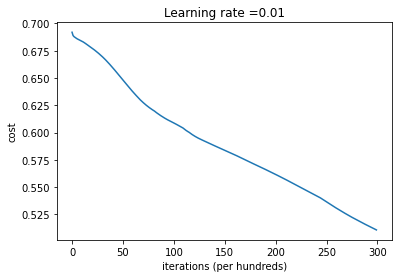

Cost after iteration 29999: 0.4592178756036098


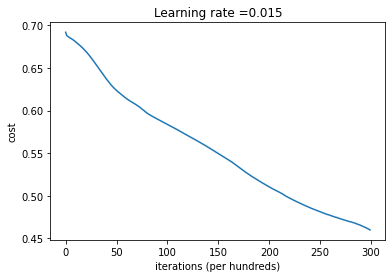

Cost after iteration 29999: 0.4187264215540887


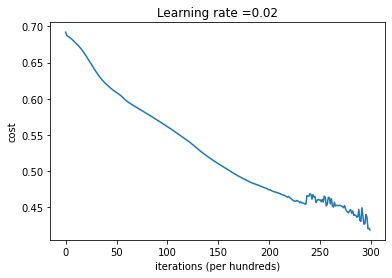

Cost after iteration 29999: 0.40581893700937466


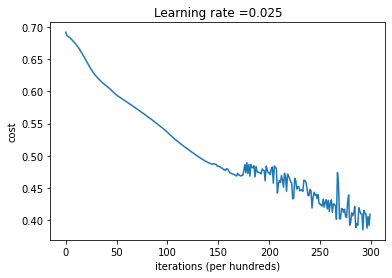

Cost after iteration 29999: 0.36269780680314795


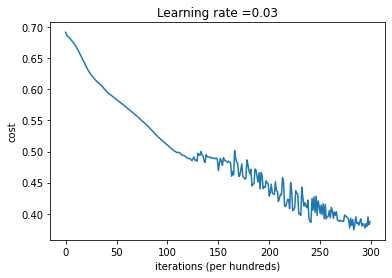

Cost after iteration 29999: 0.3503561817804692


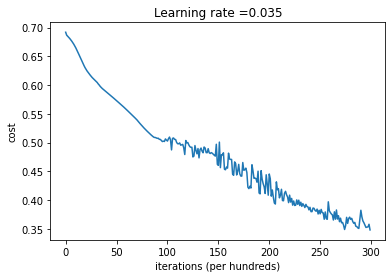

Cost after iteration 29999: 0.3970986222546343


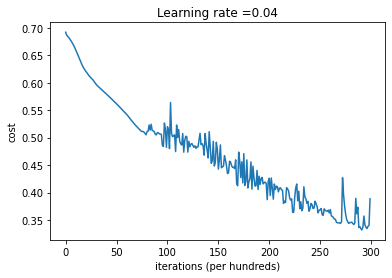

In [ ]:
for l in [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04]:
    parameters_clsnn, costs_clsnn = L_layer_model(X_train_clsnn.T, np.array(y_train_clsnn), [34, 5, 5, 1], learning_rate = l, num_iterations = 30000, final_activation = 'sigmoid', print_cost = False, lambd = 0)
    plot_costs(costs_clsnn, l)

Cost after iteration 9999: 0.5103082210730376


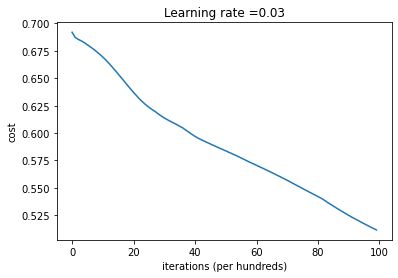

Cost after iteration 14999: 0.4692224302769182


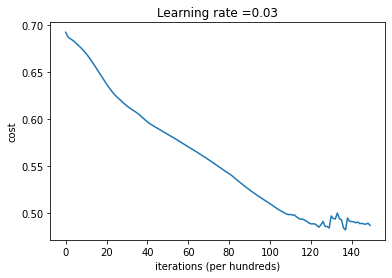

Cost after iteration 19999: 0.43101884373385446


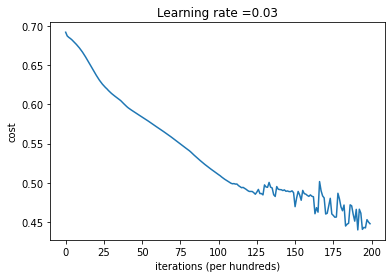

Cost after iteration 24999: 0.3946085502745177


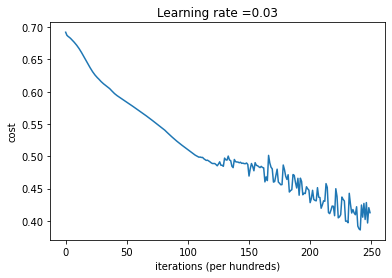

In [ ]:
for n in [10000, 15000, 20000, 25000]:
    parameters_clsnn, costs_clsnn = L_layer_model(X_train_clsnn.T, np.array(y_train_clsnn), [34, 5, 5, 1], learning_rate = 0.03, num_iterations = n, final_activation = 'sigmoid', print_cost = False, lambd = 0)
    plot_costs(costs_clsnn, 0.03)

Cost after iteration 149999: 0.3329656283158763


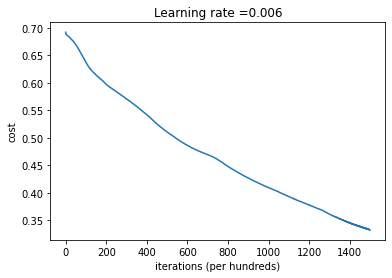

In [ ]:
parameters_clsnn1, costs_clsnn1 = L_layer_model(X_train_clsnn.T, np.array(y_train_clsnn), [34, 5, 5, 1], learning_rate = 0.006, num_iterations = 150000, final_activation = 'sigmoid', print_cost = False, lambd = 0)
plot_costs(costs_clsnn1, 0.006)

- For learning rates at or above 0.02, we do not see a continuous decline in the cost function after 20000 iterations. So, it appears that when the parameters are close to their respective minimas, the learning rate appears to be too big which is why successive parameter updates cause the cost to increase for some iterations

- That said, we keep the learning rate below 0.02. In order to reduce bias in the model (i.e. reduce the cross-entropy cost on the training set), we increase the number of iterations

- However, we notice that when we increase the number of iterations for a given learning rate, we see a non-smooth decline in the cost at higher iterations. To avoid that, we reduce the learning rate marginally when we increase the number of iterations. A drawback of reducing the learning rate is that it slows down gradient descent (which is why we need more iterations to bring the cost down)

- After trying various combinations, we see that a learning rate of 0.006 and no. of iterations at 150,000 bring the cost to its natural minimum w.r.t these parameters, which appears to be around 0.333

- We now try to reduce the cost and bias further by increasing the number of layers and nodes. Let's start by increasing the number of nodes in layers 1 and 2 to 10 and see what happens

Cost after iteration 149999: 0.042214592325394776


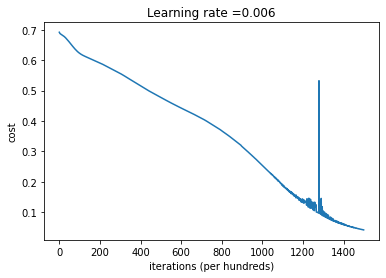

In [ ]:
parameters_clsnn2, costs_clsnn2 = L_layer_model(X_train_clsnn.T, np.array(y_train_clsnn), [34, 10, 10, 1], learning_rate = 0.006, num_iterations = 150000, final_activation = 'sigmoid', print_cost = False, lambd = 0)
plot_costs(costs_clsnn2, 0.006)

- By increasing the number of nodes in layers 1 and 2 from 5 to 10, we achieve a marked reduction in the cost from 0.333 to 0.042
- We, therefore, keep the above model (Model 2) for further consideration (i.e. detection of variance)
- Let us now add a new layer with 10 nodes and see how that impacts learning

Cost after iteration 149999: 0.006576044998164535


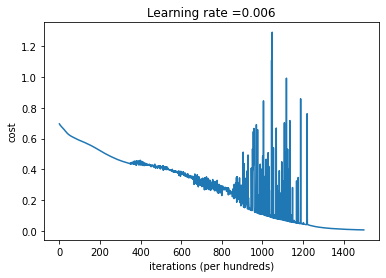

In [ ]:
parameters_clsnn3, costs_clsnn3 = L_layer_model(X_train_clsnn.T, np.array(y_train_clsnn), [34, 10, 10, 10, 1], learning_rate = 0.006, num_iterations = 150000, final_activation = 'sigmoid', print_cost = False, lambd = 0)
plot_costs(costs_clsnn3, 0.006)

- Adding a new layer reduces the cost further from 0.042 to 0.007 but at the expense of a non-smooth decline in the cost upon every successive iteration
- Nevertheless, we keep this model (Model 3) as well for further consideration (i.e. detection of variance)

In [ ]:
pred_train_clsnn2 = predict(X_train_clsnn.T, np.array(y_train_clsnn), parameters_clsnn2, final_activation = 'sigmoid')
pred_train_clsnn2

Accuracy: 0.9999999999999998


array([[0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
        0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 1.]])

In [ ]:
pred_cv_clsnn2 = predict(X_cv_clsnn.T, np.array(y_cv_clsnn), parameters_clsnn2, final_activation = 'sigmoid')
pred_cv_clsnn2

Accuracy: 0.52


array([[1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
        1., 1., 1., 1., 0., 0., 0., 0., 0.]])

In [ ]:
pred_train_clsnn3 = predict(X_train_clsnn.T, np.array(y_train_clsnn), parameters_clsnn3, final_activation = 'sigmoid')
pred_train_clsnn3

Accuracy: 0.9999999999999998


array([[0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
        0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 1.]])

In [ ]:
pred_cv_clsnn3 = predict(X_cv_clsnn.T, np.array(y_cv_clsnn), parameters_clsnn3, final_activation = 'sigmoid')
pred_cv_clsnn3

Accuracy: 0.44


array([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0.]])

- Both models are highly accurate on the training set, delivering comparable accuracy scores. However, they perform poorly on the cross-validation set, with Model 2 outperforming Model 3
- This indicates that the two models overfit the training set and are poor in generalising when given unseen data. We try to fix this problem of high variance by introducing L2 regularisation with a lambda value of 0.25

Cost after iteration 149999: 0.3243698204050548


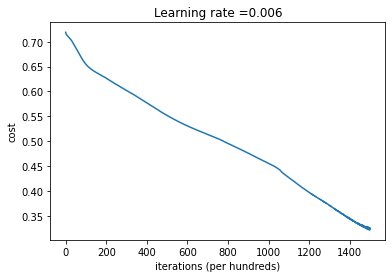

In [ ]:
parameters_clsnn2_reg, costs_clsnn2_reg = L_layer_model(X_train_clsnn.T, np.array(y_train_clsnn), [34, 10, 10, 1], learning_rate = 0.006, num_iterations = 150000, final_activation = 'sigmoid', print_cost = False, lambd = 0.25)
plot_costs(costs_clsnn2_reg, 0.006)

In [ ]:
pred_train_clsnn2_reg = predict(X_train_clsnn.T, np.array(y_train_clsnn), parameters_clsnn2_reg, final_activation = 'sigmoid')
pred_train_clsnn2_reg

Accuracy: 0.9649999999999999


array([[0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
        0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 1.]])

In [ ]:
pred_cv_clsnn2_reg = predict(X_cv_clsnn.T, np.array(y_cv_clsnn), parameters_clsnn2_reg, final_activation = 'sigmoid')
pred_cv_clsnn2_reg

Accuracy: 0.44


array([[1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
        1., 0., 1., 1., 0., 0., 0., 0., 0.]])

After regularising the weight matrices, Model 2's performance on the CV set decreases by 8% to 44%.

Cost after iteration 149999: 0.16264550747658102


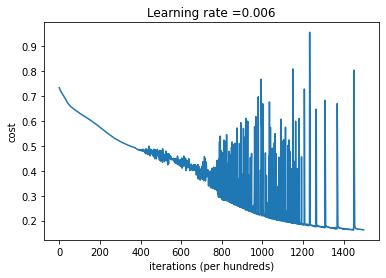

In [ ]:
parameters_clsnn3_reg, costs_clsnn3_reg = L_layer_model(X_train_clsnn.T, np.array(y_train_clsnn), [34, 10, 10, 10, 1], learning_rate = 0.006, num_iterations = 150000, final_activation = 'sigmoid', print_cost = False, lambd = 0.25)
plot_costs(costs_clsnn3_reg, 0.006)

In [ ]:
pred_train_clsnn3_reg = predict(X_train_clsnn.T, np.array(y_train_clsnn), parameters_clsnn3_reg, final_activation = 'sigmoid')
pred_train_clsnn3_reg

Accuracy: 0.9999999999999998


array([[0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
        0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 1.]])

In [ ]:
pred_cv_clsnn3_reg = predict(X_cv_clsnn.T, np.array(y_cv_clsnn), parameters_clsnn3_reg, final_activation = 'sigmoid')
pred_cv_clsnn3_reg

Accuracy: 0.48000000000000004


array([[1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 1., 0.]])

After regularising the weight matrices, Model 3's performance on the test set increases by 4% to 48%. This is only a marginal increase. We would, therefore, favour Model 2 without regularisation followed by Model 3 with regularisation, and evaluate these models' performance on the test set.

### Step-5: Performance Assessment of Chosen Models on the Test Set

In [ ]:
pred_test_clsnn2 = predict(X_test_clsnn.T, np.array(y_test_clsnn), parameters_clsnn2, final_activation = 'sigmoid')
pred_test_clsnn2

Accuracy: 0.5


array([[0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 0., 0., 1., 1.]])

In [ ]:
pred_test_clsnn3_reg = predict(X_test_clsnn.T, np.array(y_test_clsnn), parameters_clsnn3_reg, final_activation = 'sigmoid')
pred_test_clsnn3_reg

Accuracy: 0.5384615384615384


array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
        0., 1., 1., 1., 1., 1., 0., 1., 0., 1.]])

Model 3 with regularisation outperforms Model 2 without regularisation on the test set. However, in general, both models' predictions are only as good as a naive classifier. So, a classification NN does poorly in explaining unseen examples from the dataset.

## 8.2 Run a Regression Neural Network.  The difference here is the response is continuous.  This value should be the weekly return that you calculated on each series. Choose a suitable number of layers, basing your result on cross-validation

### Step-1: Importing and Processing the Dataset

In [109]:
# Creating the dataset and normalising the features
X=df.copy()
X.drop(columns=['Date', 'LUXXX'], inplace=True)
X_return=np.log(X).diff().dropna()

y=df.LUXXX
y_return = np.log(y).diff().dropna()
#print(X.shape)
#print(X_return)

data_regnn = X_return.copy()
data_regnn.insert(0, 'LUXXX', y_return)

data_regnn

LUXXX  MSCI ARGENTINA  ...   MSCI UK  MSCI USA
1   -0.074195       -0.049800  ... -0.054471 -0.062333
2   -0.026828       -0.019360  ... -0.017321 -0.023373
3   -0.002325        0.028663  ...  0.015932  0.013631
4    0.034538        0.076008  ...  0.031365  0.016272
5   -0.018352        0.006768  ... -0.038795 -0.032605
..        ...             ...  ...       ...       ...
247 -0.062581       -0.039489  ... -0.028733 -0.005265
248  0.048259        0.037665  ...  0.010080  0.016219
249  0.036408        0.071181  ...  0.017587  0.038317
250 -0.007073        0.006575  ... -0.018909  0.002575
251  0.020832       -0.005722  ... -0.008350 -0.006049

[251 rows x 35 columns]

### Step-2: Neural Network Helper Functions For Classification and Regression

This step has already been carried out in Ex 8.1.

### Step-3: Splitting the Regression Data into Train, Cross-validation and Test Sets

In [110]:
y_test_regnn, X_test_regnn, y_train_regnn, X_train_regnn, y_cv_regnn, X_cv_regnn = data_split(data_regnn, 'LUXXX')

### Step-4: Regression Neural Network Training and Hyperparameter Tuning on Cross-validation

We start by considering a 3 layer model with 5 nodes in each layer, and assess how gradient descent with 30,000 iterations for this model behaves for different learning rates.

Cost after iteration 29999: 0.00033130858231250957


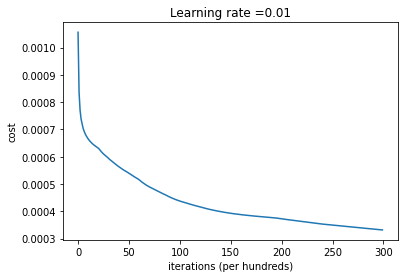

Cost after iteration 29999: 0.00029932384205288396


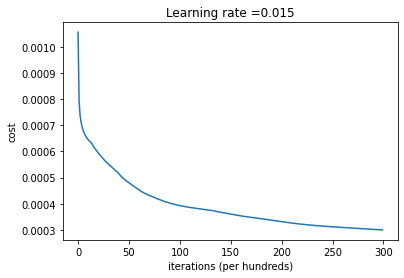

Cost after iteration 29999: 0.00028064495837988053


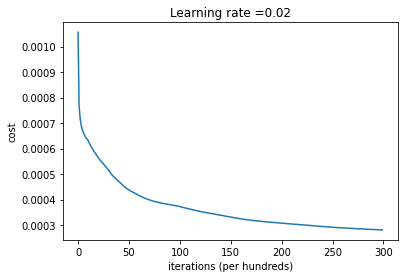

Cost after iteration 29999: 0.00026051754098956016


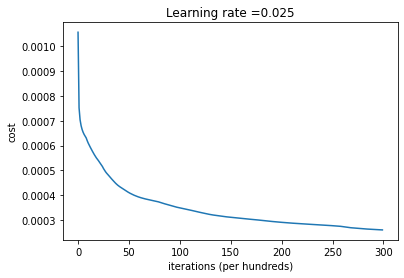

Cost after iteration 29999: 0.00025117508410942046


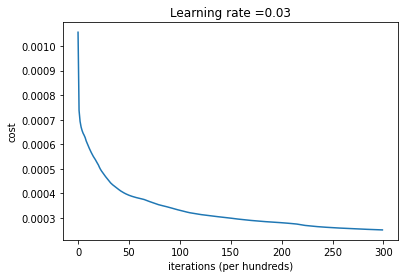

Cost after iteration 29999: 0.0002392640894512233


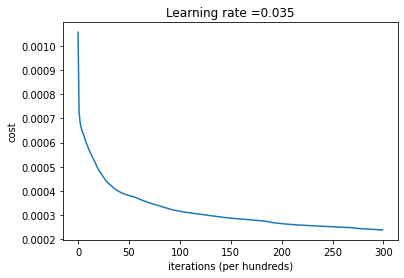

Cost after iteration 29999: 0.00023147404565082948


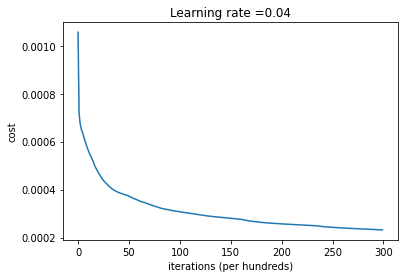

In [100]:
for l in [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04]:
    parameters_regnn, costs_regnn = L_layer_model(X_train_regnn.T, np.array(y_train_regnn), [34, 5, 5, 1], learning_rate = l, num_iterations = 30000, final_activation = 'linear', print_cost = False, lambd = 0)
    plot_costs(costs_regnn, l)

It appears that for all of the learning rates, gradient descent brings the cost to near zero with only 1/5th of the number of iterations required to train the classification neural nets. We, therefore, use a learning rate of 0.04 and 30,000 iterations along with this 3-layer network with 5 nodes in each layer, and evaluate its performance on the CV set.

Cost after iteration 29999: 0.00023147404565082948


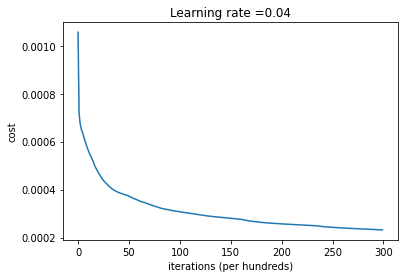

In [101]:
parameters_regnn1, costs_regnn1 = L_layer_model(X_train_regnn.T, np.array(y_train_regnn), [34, 5, 5, 1], learning_rate = 0.04, num_iterations = 30000, final_activation = 'linear', print_cost = False, lambd = 0)
plot_costs(costs_regnn1, 0.04)

In [102]:
pred_train_regnn1 = predict(X_train_regnn.T, np.array(y_train_regnn), parameters_regnn1, final_activation = 'linear')
pred_train_regnn1

RMSE:0.021516142370124856


array([[-0.00616265, -0.00685653,  0.01723117, -0.00376798,  0.02829766,
         0.02331949, -0.07151885, -0.01396569,  0.00493477,  0.01045864,
         0.00868944, -0.00623579,  0.0131636 , -0.03555727,  0.0166257 ,
         0.00813447,  0.01370706, -0.00472065, -0.01243066,  0.01683217,
        -0.02117735,  0.01024949,  0.01494378, -0.02889769,  0.02747285,
         0.04541688, -0.00444062,  0.02921665, -0.05770873,  0.00343174,
         0.00787474,  0.01322281,  0.01706203, -0.00736985,  0.0235092 ,
        -0.01902532,  0.03600464, -0.0100728 ,  0.03335382,  0.00424015,
         0.01152754, -0.00550388, -0.02235371,  0.06713595, -0.02198507,
         0.01517326, -0.01290843, -0.00486189,  0.0111366 ,  0.00735692,
        -0.03197089,  0.00609669, -0.00536974,  0.04759616,  0.00682227,
         0.0013731 , -0.06984094,  0.03356799, -0.00385871,  0.0297374 ,
         0.00912762,  0.02962019,  0.03016954, -0.02617032, -0.00184749,
        -0.00360895,  0.03167602, -0.00714659, -0.0

Text(0.5, 1.0, 'Predicted and Ground Truth Returns - Training Set')

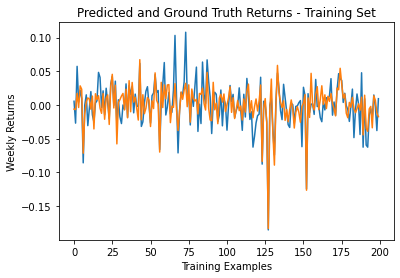

In [103]:
plt.plot(np.array(y_train_regnn).reshape(200,1))
plt.plot(pred_train_regnn1.reshape(200,1))
plt.xlabel("Training Examples")
plt.ylabel("Weekly Returns")
plt.title("Predicted and Ground Truth Returns - Training Set")

In [104]:
pred_cv_regnn1 = predict(X_cv_regnn.T, np.array(y_cv_regnn), parameters_regnn1, final_activation = 'linear')
pred_cv_regnn1

RMSE:0.02150608566894974


array([[ 0.01727832, -0.00751319, -0.02919094, -0.00152894, -0.01105046,
        -0.00785834, -0.00960375,  0.01240888,  0.01712472, -0.02315328,
         0.01051675, -0.00658117,  0.00413053,  0.009803  , -0.05940162,
        -0.02707653,  0.01009605,  0.02773588,  0.01200827, -0.02097982,
        -0.01114459,  0.00615347, -0.04917856, -0.02126807,  0.00484436]])

Text(0.5, 1.0, 'Predicted and Ground Truth Returns - CV Set')

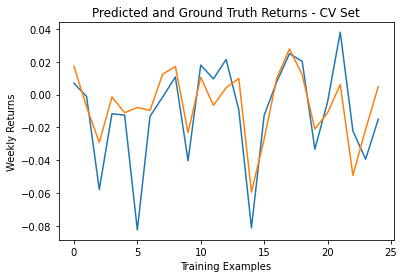

In [105]:
plt.plot(np.array(y_cv_regnn).reshape(25,1))
plt.plot(pred_cv_regnn1.reshape(25,1))
plt.xlabel("Training Examples")
plt.ylabel("Weekly Returns")
plt.title("Predicted and Ground Truth Returns - CV Set")

The chosen model performs well on the training set (implying low bias) and, when tested on the CV set, has low RMSE as well. This indicates that the model generalizes well to unseen data. We now add a new hidden layer with 5 nodes and see how that impacts the MSE cost.

Cost after iteration 29999: 0.0002532887073612537


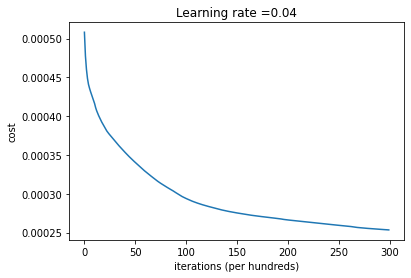

In [106]:
parameters_regnn2, costs_regnn2 = L_layer_model(X_train_regnn.T, np.array(y_train_regnn), [34, 5, 5, 5, 1], learning_rate = 0.04, num_iterations = 30000, final_activation = 'linear', print_cost = False, lambd = 0)
plot_costs(costs_regnn2, 0.04)

As shown above, the minimum cost is slightly higher for the above NN with 3 hidden layers. We, therefore, choose to stick with the network with 2 hidden layers and evaluate its performance on the test set.

### Step-5: Performance Assessment of Chosen Model on the Test Set

In [107]:
pred_test_regnn1 = predict(X_test_regnn.T, np.array(y_test_regnn), parameters_regnn1, final_activation = 'linear')
pred_test_regnn1

RMSE:0.02809596591047015


array([[-2.77953021e-03,  1.32704922e-05,  5.00239556e-02,
         1.06709189e-03,  9.83029165e-03, -2.62961062e-02,
         1.44822575e-02,  1.64705410e-02,  1.19305932e-02,
         1.40726555e-02, -1.94881392e-02, -7.48303929e-02,
         1.22421216e-02,  1.21772352e-02, -1.13126010e-02,
         4.24594310e-03,  2.82867129e-02,  8.55815534e-04,
         4.65106995e-02,  7.80035999e-04,  3.26663856e-02,
         1.67027061e-02,  8.88750953e-03, -3.46225761e-02,
         1.28688898e-02,  9.70491643e-03]])

Text(0.5, 1.0, 'Predicted and Ground Truth Returns - Test Set')

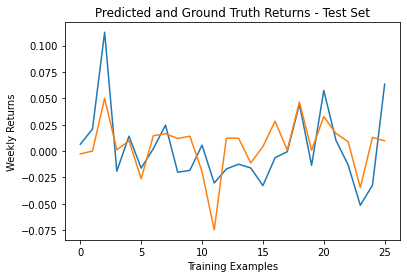

In [108]:
plt.plot(np.array(y_test_regnn).reshape(26,1))
plt.plot(pred_test_regnn1.reshape(26,1))
plt.xlabel("Training Examples")
plt.ylabel("Weekly Returns")
plt.title("Predicted and Ground Truth Returns - Test Set")

## 8.3 Which performed better, the classification or the regression network?

It is hard to compare the performance of the classification NN with that of the regression NN. Firstly, both datasets have different dependent variables and can, therefore, be thought of as different problems. Secondly, the classification NN is evaluated based on the % of observations it classifies correctly, whereas we evaluate the regression NN based on the Root Mean Squared Error between the predicted values and the ground truth values. So, the performance measures used to evaluate the two networks are different.

Nevertheless, even without comparing it to the regression NN, we can say that the classification NN does a poor job of predicting the dependent variable (weekly return direction of the LUXXX fund). It is only accurate about 50% of the time on the test set. 

In contrast, the regression NN seems to do a fair job in predicting weekly returns. It does well when weekly return changes on the test set are small but doesn’t return a satisfactory prediction when the weekly return changes by a large magnitude.